In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv("../../metadata/supp1.csv")
meta.head()

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,karyotype_2Ra,karyotype_2Rh,median_coverage
0,VBS24195,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,36
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3Ra/a,3Rb/b,2Ra/a,2R+/+,30
2,VBS24197,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,36
3,VBS24198,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,21
4,VBS24199,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3Ra/a,3Rb/b,2Ra/a,2R+/+,34


In [3]:
def prep_doubleton_df(doub):
    #we're effectively double counting each doubleton
    #to be able to visualise the pattern for each cohort
    doubsym = doub+np.tril(doub.T.values)
    return doubsym

In [30]:
def plot_doubleton_sharing(doub, colours):
    fig, ax = plt.subplots(doub.shape[0],1,figsize=(8.5,6.5))
    abbrev = ['GH-N', 'BJ', 'GH-A', 'NG', 'CM', 'CD-H', 'UG', 'KE-N', 'GA', 'CD-K', 'MZ-C', 'ZM', 'MZ-M']
    ylim = doub.values.max().max()
    for n, cohort in enumerate(doub.columns):
        ax[n].bar(np.arange(doub.shape[0]), doub[cohort], color=colours)
        ax[n].set_ylim(0,ylim)
        ax[n].spines['top'].set_visible(False)
        ax[n].spines['right'].set_visible(False)
        ax[n].spines['bottom'].set_visible(False)
        ax[n].spines['left'].set_visible(False)
        ax[n].set_yticks([ylim/2], [abbrev[n]])
        ax[n].tick_params(axis='y', length=0)
        ax[n].set_xticks([])
        ax[n].text(12.5, ylim*.4, f'{int(doub.loc[cohort, cohort]//10000)} - {int(doub[cohort].sum()//10000)}', va='center')

    ax[n].set_xticks(np.arange(doub.shape[0]), 
        abbrev)
    ax[n].tick_params(axis='x', length=0)
    plt.savefig(f'hic30/doubletons_indiv.svg')

In [7]:
#sum doubleton values over all chromosome arms
doub = pd.read_csv("hic30/doubletons_2L.tsv", index_col=0, sep='\t')
print(doub.iloc[0,0])
for reg in ['2R1', '2R2', '3L', '3R']:
    doub+=pd.read_csv(f"hic30/doubletons_{reg}.tsv", index_col=0, sep='\t')
    print(doub.iloc[0,0])

90331.0
138372.0
164488.0
198972.0
257109.0


In [9]:
doub.sum().sum()

9811404.0

In [11]:
doub = prep_doubleton_df(doub)

In [13]:
doub.sum().sum()

19622808.0

In [15]:
doub = doub.loc[['Ghana_Northern-Region', 'Benin_Atlantique-Dept',
       'Ghana_Ashanti-Region', 'Nigeria_Ogun-State', 'Cameroon_Adamawa',
       'DRC_Haut-Uele', 'Uganda_Eastern-Region',
       'Kenya_Nyanza-Prov', 'Gabon_Haut-Ogooue',
       'DRC_Kinshasa', 'Mozambique_Cabo-Delgado',
       'Zambia_Eastern-Prov', 'Mozambique_Maputo'], 
                ['Ghana_Northern-Region', 'Benin_Atlantique-Dept',
       'Ghana_Ashanti-Region', 'Nigeria_Ogun-State', 'Cameroon_Adamawa',
       'DRC_Haut-Uele', 'Uganda_Eastern-Region',
       'Kenya_Nyanza-Prov', 'Gabon_Haut-Ogooue',
       'DRC_Kinshasa', 'Mozambique_Cabo-Delgado',
       'Zambia_Eastern-Prov', 'Mozambique_Maputo']]

In [20]:
x = meta[['geographic_cohort', 'geographic_cohort_colour']].drop_duplicates()
colour_dict = dict(zip(x.geographic_cohort, x.geographic_cohort_colour))
colours = np.array([colour_dict[cohort] for cohort in doub.columns])

In [16]:
doub

,Ghana_Northern-Region,Benin_Atlantique-Dept,Ghana_Ashanti-Region,Nigeria_Ogun-State,Cameroon_Adamawa,DRC_Haut-Uele,Uganda_Eastern-Region,Kenya_Nyanza-Prov,Gabon_Haut-Ogooue,DRC_Kinshasa,Mozambique_Cabo-Delgado,Zambia_Eastern-Prov,Mozambique_Maputo
Ghana_Northern-Region,514218.0,27981.0,62549.0,54224.0,46996.0,56873.0,49901.0,47421.0,3883.0,8734.0,8404.0,9887.0,8754.0
Benin_Atlantique-Dept,27981.0,1432398.0,98313.0,92259.0,88051.0,100086.0,88056.0,88029.0,4710.0,10823.0,7876.0,11013.0,9802.0
Ghana_Ashanti-Region,62549.0,98313.0,880826.0,334170.0,241199.0,247706.0,218651.0,196074.0,9186.0,19895.0,13554.0,18771.0,16855.0
Nigeria_Ogun-State,54224.0,92259.0,334170.0,1173728.0,225584.0,240163.0,210441.0,188689.0,8969.0,19163.0,12534.0,17717.0,15566.0
Cameroon_Adamawa,46996.0,88051.0,241199.0,225584.0,1321758.0,215647.0,183235.0,166573.0,7881.0,16612.0,11248.0,16064.0,14574.0
DRC_Haut-Uele,56873.0,100086.0,247706.0,240163.0,215647.0,660086.0,410031.0,377413.0,10045.0,21924.0,16042.0,23766.0,19269.0
Uganda_Eastern-Region,49901.0,88056.0,218651.0,210441.0,183235.0,410031.0,537336.0,482809.0,9171.0,20181.0,15336.0,22856.0,17400.0
Kenya_Nyanza-Prov,47421.0,88029.0,196074.0,188689.0,166573.0,377413.0,482809.0,579614.0,9137.0,21653.0,17110.0,26480.0,17863.0
Gabon_Haut-Ogooue,3883.0,4710.0,9186.0,8969.0,7881.0,10045.0,9171.0,9137.0,237978.0,37452.0,3228.0,5383.0,3349.0
DRC_Kinshasa,8734.0,10823.0,19895.0,19163.0,16612.0,21924.0,20181.0,21653.0,37452.0,307954.0,8576.0,14363.0,8533.0


In [17]:
doub.columns

Index(['Ghana_Northern-Region', 'Benin_Atlantique-Dept',
       'Ghana_Ashanti-Region', 'Nigeria_Ogun-State', 'Cameroon_Adamawa',
       'DRC_Haut-Uele', 'Uganda_Eastern-Region', 'Kenya_Nyanza-Prov',
       'Gabon_Haut-Ogooue', 'DRC_Kinshasa', 'Mozambique_Cabo-Delgado',
       'Zambia_Eastern-Prov', 'Mozambique_Maputo'],
      dtype='object')

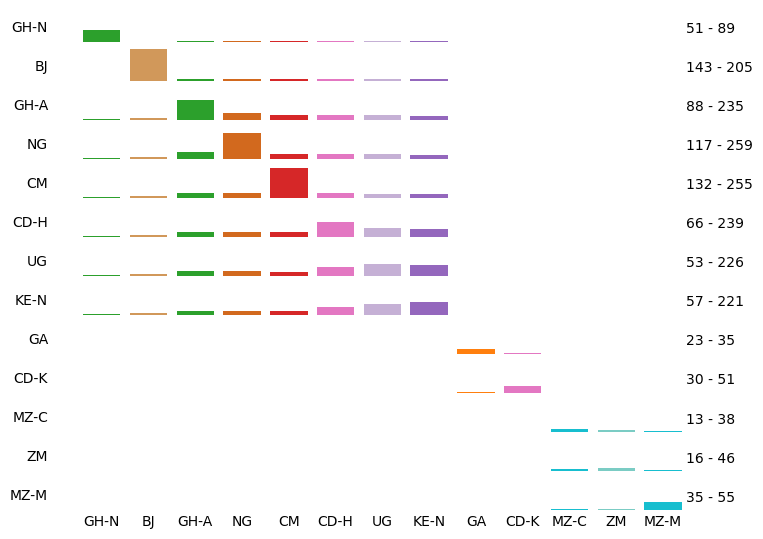

In [31]:
plot_doubleton_sharing(doub, colours=colours)